## Time Series Forecasting with FB Prophet¶


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. (https://facebook.github.io/prophet/)


In this example, we are going to install fbprophet and create a forecasting model with a sample dataset.


In [1]:
 #  pip install fbprophet==0.6


Since jupyter notebooks sometimes give holiday errors, such as easter date errors, try to install prophet 0.6 and install the holidays packet to prevent the errors.


In [2]:
# pip install holidays==0.9.12

In [3]:
import fbprophet
#  pip install plotly

import pandas as pd
from pandas import read_csv 

We will use the historical car sale dataset provided by Jason Brownlee in his github page. (https://github.com/jbrownlee/Datasets/blob/master/monthly-car-sales.csv)

In [4]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)

In [5]:
df.head(-5)

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
98,1968-03,20139
99,1968-04,21725
100,1968-05,26099
101,1968-06,21084


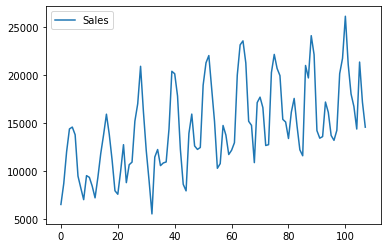

In [6]:
from matplotlib import pyplot
df.plot()
pyplot.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [8]:
from pandas import to_datetime
df['Month']=to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   108 non-null    datetime64[ns]
 1   Sales   108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


in order to fit to prophet model, we should define a ds and y column

In [9]:
df.columns=['ds','y']
df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [10]:
from fbprophet import Prophet
model=Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


First, we should select and define a period for which we want a prediction, and loop over these dates. We can add columns of lower date, upper date and predict between these dates, after that we can compare with the actual values


          ds          yhat    yhat_lower    yhat_upper
0 1966-01-01  13316.030314  11837.708030  14841.409833
1 1966-02-01  14008.196001  12365.427866  15609.837084
2 1966-03-01  19289.136081  17681.193061  20824.195210
3 1966-04-01  21513.466620  19871.624179  23027.168436
4 1966-05-01  23220.549766  21724.778931  24855.486578


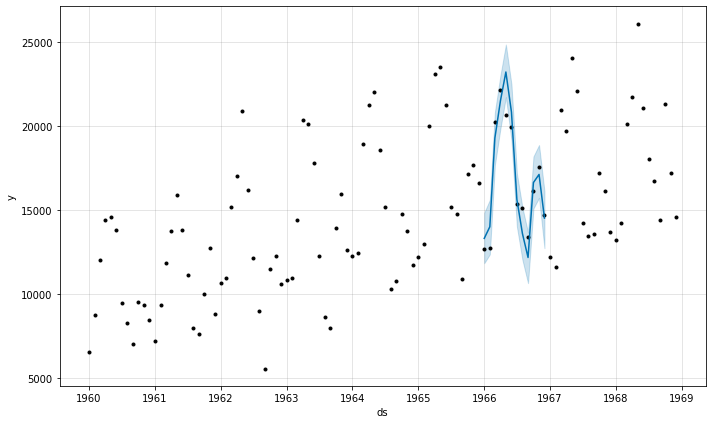

In [12]:
from pandas import DataFrame
future = list()
for i in range(1, 13):
    date = '1966-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

# now, lets forecast with our model
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast)
pyplot.show()

We can see that predicted values are not very different from the actual values, especially when we evaluate within the lower and higher boundaries.
We can also try a future date which is not within our data sample.

In [14]:
futuredates=pd.date_range('1968-08-01','1980-01-01', 
              freq='MS').strftime("%Y-%m-%d").tolist()
futuredatesdf=DataFrame(futuredates, columns=['ds'])
futuredatesdf.head()

,ds
0,1968-08-01
1,1968-09-01
2,1968-10-01
3,1968-11-01
4,1968-12-01


/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


          ds          yhat    yhat_lower    yhat_upper
0 1968-08-01  15303.792858  13780.344077  16895.822931
1 1968-09-01  13736.619378  12167.103488  15301.479874
2 1968-10-01  18151.023026  16702.443062  19671.952645
3 1968-11-01  17485.572882  16064.835184  19064.897645
4 1968-12-01  15690.427568  14136.393676  17292.784957


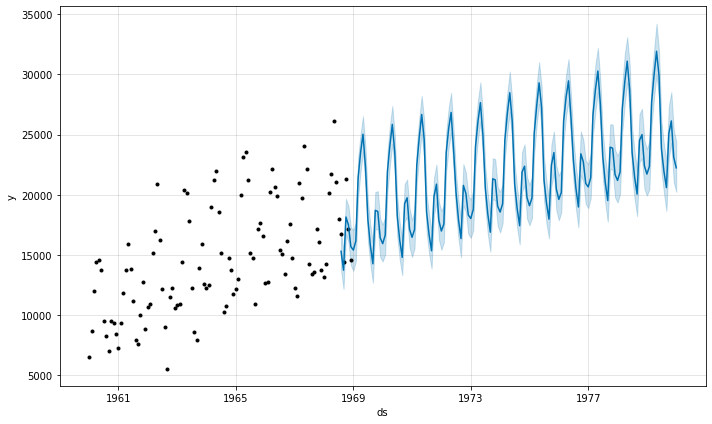

In [15]:
forecast2 = model.predict(futuredatesdf)
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast2)
pyplot.show()

In [16]:
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1968-08-01,18198.485811,13780.344077,16895.822931,18198.485811,18198.485811,-2894.692954,-2894.692954,-2894.692954,-2894.692954,-2894.692954,-2894.692954,0.0,0.0,0.0,15303.792858
1,1968-09-01,18254.176004,12167.103488,15301.479874,18254.176004,18254.176004,-4517.556626,-4517.556626,-4517.556626,-4517.556626,-4517.556626,-4517.556626,0.0,0.0,0.0,13736.619378
2,1968-10-01,18308.069738,16702.443062,19671.952645,18308.069738,18308.069738,-157.046713,-157.046713,-157.046713,-157.046713,-157.046713,-157.046713,0.0,0.0,0.0,18151.023026
3,1968-11-01,18363.759931,16064.835184,19064.897645,18363.759931,18363.759931,-878.187049,-878.187049,-878.187049,-878.187049,-878.187049,-878.187049,0.0,0.0,0.0,17485.572882
4,1968-12-01,18417.653665,14136.393676,17292.784957,18417.653665,18417.653665,-2727.226097,-2727.226097,-2727.226097,-2727.226097,-2727.226097,-2727.226097,0.0,0.0,0.0,15690.427568
